In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import pandas as pd

In [202]:
def batch_gradient_descent(x, y, epochs, a = 0.0001):
    theta = np.zeros(2)
    
    converge = False
    #theta_prev = the
    #while not converge:
    for e in range(epochs):
        sum_0 = 0
        sum_1 = 0
        #for j in range(2):
        for i in range(len(x)):

            sum_0 += ((theta[0] + theta[1] * x[i]) - y[i])*1
            theta[0] = theta[0] - a*sum_0
            
            sum_1 += ((theta[0] + theta[1] * x[i]) - y[i])*x[i] 
            theta[1] = theta[1] - a*sum_1
    return theta

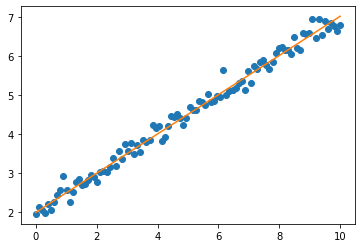

In [203]:
clean_x = np.linspace(0,10,100)
clean_y = 0.5*(clean_x)+2
noisy_y = np.random.normal(clean_y, scale = 0.2)

for i in range(20):
    t = batch_gradient_descent(clean_x, noisy_y, epochs=i)
    plt.plot(clean_x, noisy_y, 'o')
    plt.plot(clean_x, t[1]*clean_x+t[0])
    plt.show()
    clear_output(wait=True)

# 1b
newton

\\[\theta = \theta - H^{-1}\nabla _{\theta }\ell (\theta ) \\]

where 

\\[H_{ij} = \frac{\partial^{2}\ell (\theta) }{\partial \theta_{i}\partial \theta_{j}} \\]

recall

\\[\ell(\theta) = \sum_{i=1}^{n}y^{(i)}\log h(x^{(i)}) + (1-y^{(i)})\log (1-h(x^{(i)})) \\]

where

\\[h(x) = g(\theta^{T}x) = \frac{1}{1+e^{-\theta^{T}x}}\\]

solution implemented from github/zyxue.  Not sure how the homework problem statement arrives at the average empirical loss and why that is then used in the algorithm, over the formulas in lecture.

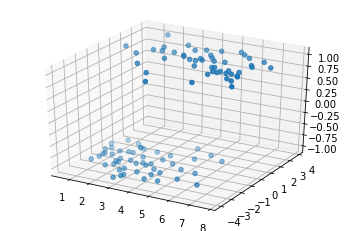

In [3]:
X = np.loadtxt('./data/logistic_x.txt', dtype=float)
Ys = np.loadtxt('./data/logistic_y.txt', dtype=float)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Ys)
plt.show()
Xs = np.hstack([np.ones((X.shape[0], 1)), X]) #adding intercept terms

In [33]:
def newton(x,y):
    theta = np.zeros(x.shape[1])
    tol = 1e9
    n_iter = 0
    while tol > 1e-6:
        z = y * x.dot(theta)
        g = 1/(1+ np.exp(-z))
        gradient = np.mean((g-1) * y * x.T, axis=1)
        hessian = np.zeros((x.shape[1], x.shape[1]))
        for i in range(hessian.shape[0]):
            for j in range(hessian.shape[0]):
                if i <= j:
                    hessian[i][j] = np.mean(g * (1-g) *x[:,i] * x[:,j])
                    if i != j:
                        hessian[j][i] = hessian[i][j]
        theta_curr = theta.copy()
        theta = theta - np.linalg.inv(hessian).dot(gradient)
        n_iter += 1
        tol = np.sum(np.abs(theta - theta_curr))
        return theta
    
theta = newton(Xs,Ys)

In [ ]:
###TRYING TO PLOT SIGMOID IN 3D: FAIL
#sig_x = np.hstack([np.linspace(0,10,100), np.linspace(0,10,100)])
#sig_x = np.hstack([np.ones((Xs.shape[0])), sig_x])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xs[:,1], Xs[:,2], Ys)
sigmoid = lambda x: 1/(1+np.exp(-x.dot(theta)))
ax.plot(np.linspace(0,10,100),np.linspace(0,10,100) ,sigmoid(sig_x))

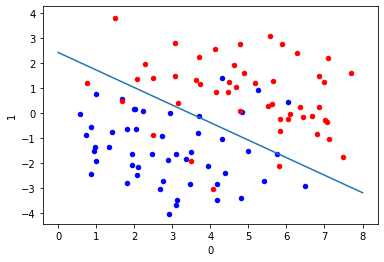

In [34]:
ax = plt.axes()
df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(Ys)
df_X['label'] = df_Y[0].values

df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')
th_x = np.linspace(0,8,100)
_ys = (theta[0]+ theta[1]*th_x)/(- theta[2])
plt.plot(th_x, _ys)

In [46]:
output = np.hstack((X,np.reshape(Ys, (99,1))))

In [49]:
np.savetxt('output.txt',output)

## using sklearn

In [8]:
from sklearn.linear_model import LogisticRegression

In [48]:
clf = LogisticRegression(solver='liblinear').fit(X,Ys)

(0, 9)

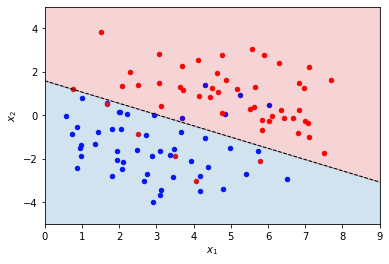

In [63]:
ax = plt.axes()
df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(Ys)
df_X['label'] = df_Y[0].values

df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')
w1,w2 = clf.coef_.T
b = clf.intercept_[0]
c = -b/w2  # https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/
m = -w1/w2
xmin, xmax = 0, 9
ymin, ymax = -5, 5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd,yd,ymin, color = 'tab:blue', alpha = 0.2)
plt.fill_between(xd,yd,ymax, color = 'tab:red', alpha = 0.2)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')
plt.ylim([ymin, ymax]);plt.xlim([xmin, xmax])

In [65]:
logit_ps1.predict([[1,2]])

array([1.])